Mounted at /content/drive


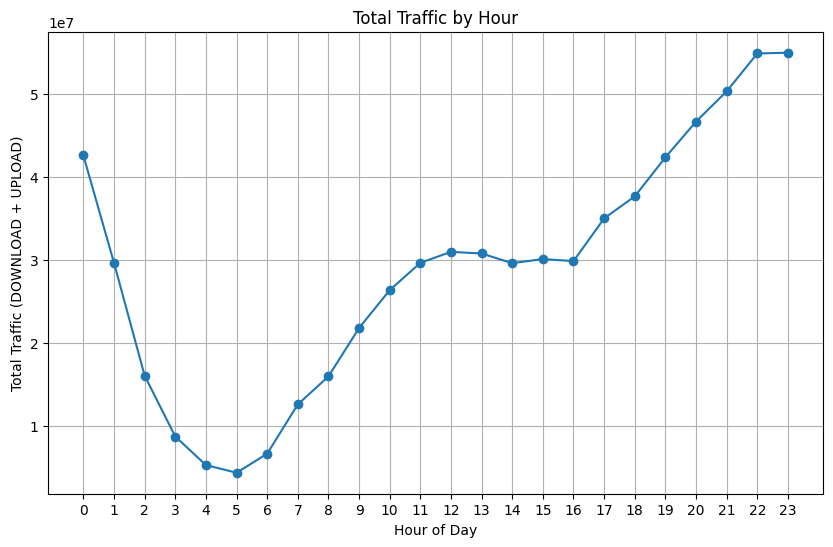

En yoğun trafik saati:  23.0 Toplam trafik:  54935674.205
En az yoğun trafik saati:  5.0 Toplam trafik:  4322395.779


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_excel('/content/drive/My Drive/dataset.xlsx')

# hour time stamp
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])
df['HOUR'] = df['TIME_STAMP'].dt.hour

#total traffic calculation
df['TOTAL_TRAFFIC'] = df['DOWNLOAD'] + df['UPLOAD']

# Aggregate the sum data
traffic_by_hour = df.groupby('HOUR')['TOTAL_TRAFFIC'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(traffic_by_hour['HOUR'], traffic_by_hour['TOTAL_TRAFFIC'], marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Total Traffic (DOWNLOAD + UPLOAD)')
plt.title('Total Traffic by Hour')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

max_traffic_hour = traffic_by_hour.loc[traffic_by_hour['TOTAL_TRAFFIC'].idxmax()]
print("En yoğun trafik saati: ", max_traffic_hour['HOUR'], "Toplam trafik: ", max_traffic_hour['TOTAL_TRAFFIC'])

min_traffic_hour = traffic_by_hour.loc[traffic_by_hour['TOTAL_TRAFFIC'].idxmin()]
print("En az yoğun trafik saati: ", min_traffic_hour['HOUR'], "Toplam trafik: ", min_traffic_hour['TOTAL_TRAFFIC'])

